# The VAR Model

In this notebook you will discover the VAR model, short for the Vector Autoregression model. Vector Autoregression models the development over time of multiple variables at the same time.

The term autoregression should sound familiar from the previous sessions. The
Vector Autoregression model is part of the family of time series models. Like other models from this category, it predicts the future based on developments in the past of the target variables.

There is an important specificity to Vector Autoregression.

Unlike most other models, Vector Autoregression models multiple target variables at the same time. The multiple variables are used at the same time as target variables and as explanatory variables for each other.

A model that uses multiple target variables in one model is called a multivariate model or, more specifically, multivariate time series.



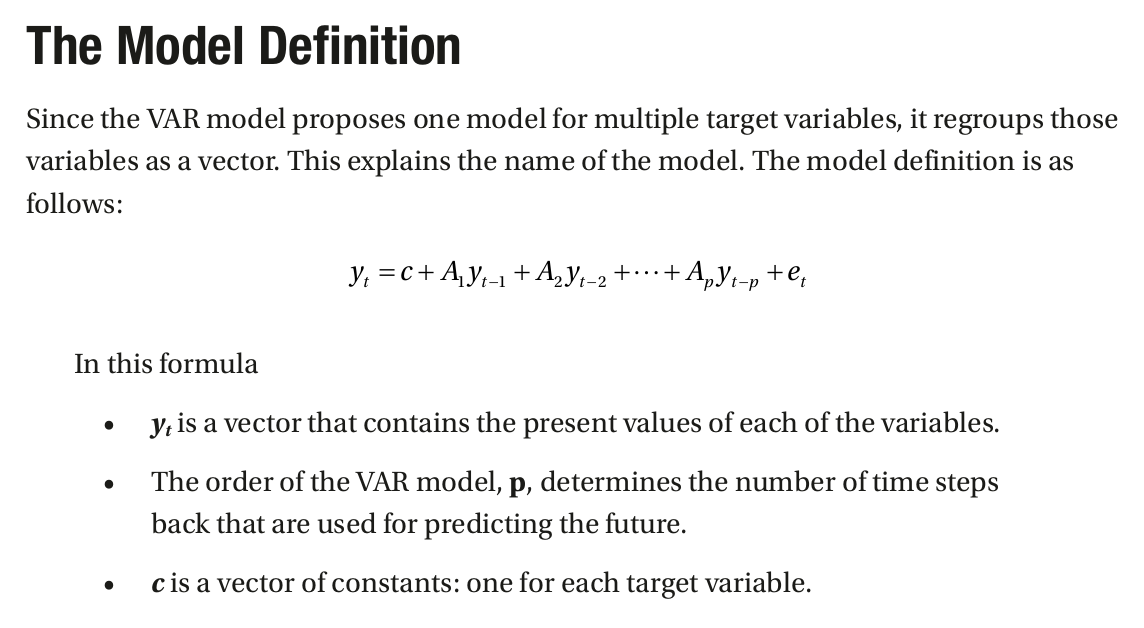

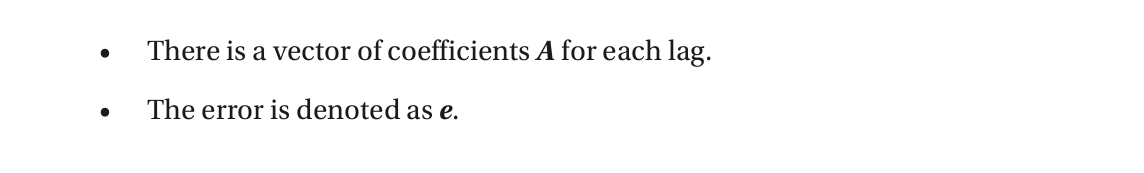

**The error terms must satisfy three conditions:**

    1) Every error term has a mean of zero.
    2) The contemporaneous covariance matrix of error terms is a k × k positive-semidefinite matrix denoted Ω.
    3) There is no correlation across time. In particular, there is no serial correlation in individual error terms

**Remark: SVAR (Structural-VAR)**

The error terms (structural shocks) satisfy the conditions (1) - (3) in the definition above, with the particularity that all the elements in the off diagonal of the covariance matrix are zero. That is, the structural shocks are uncorrelated.

The process of choosing the maximum lag p in the VAR model requires special attention because inference is dependent on correctness of the selected lag order.

So how does the number of lags work in the VAR model?

In the previous models, you have seen relatively complex situations with hyperparameters to be estimated for the order of different types of processes.

The VAR model is much simpler in this regard.

There is only one order to be defined: the order of the model as a whole.

The notation for this order is VAR(p), in which p is the order.

The order defines how many time steps back in time are taken into account for
explaining the present. An order 1 means only the previous time step is taken into account. An order 2 means that the two previous time steps are used. And so on.

You can also call this the number of lags that are included.

If a lag is included, it is always included for all the variables.

It is not possible with the VAR model to use different lags for different variables.

# Stationarity

Another concept that you have seen before is stationarity, so let’s find out how that works in the VAR model.

If you remember, stationarity means that a time series has no trend: it is stable overthe long term. You can use the Augmented Dickey Fuller test to test whether a time series is stationary or not.
You have also seen the technique called differencing, or integration, to make a non-­stationary time series stationary.

This theory is also very important for the VAR model.


**A VAR model can work only ifeach of the variables in the model is stationary.**

When doing VAR models, you generally work on multiple variables at the same time, so it can be a bit cumbersome to handle if some of the time series are stationary and others not.

In that case, differencing should be applied only to the non-stationary time series.

There is one exception to this rule: the **Vector Error Correction model** is a type of VAR that does not require stationarity. This model can be a good alternative to the VAR-model.

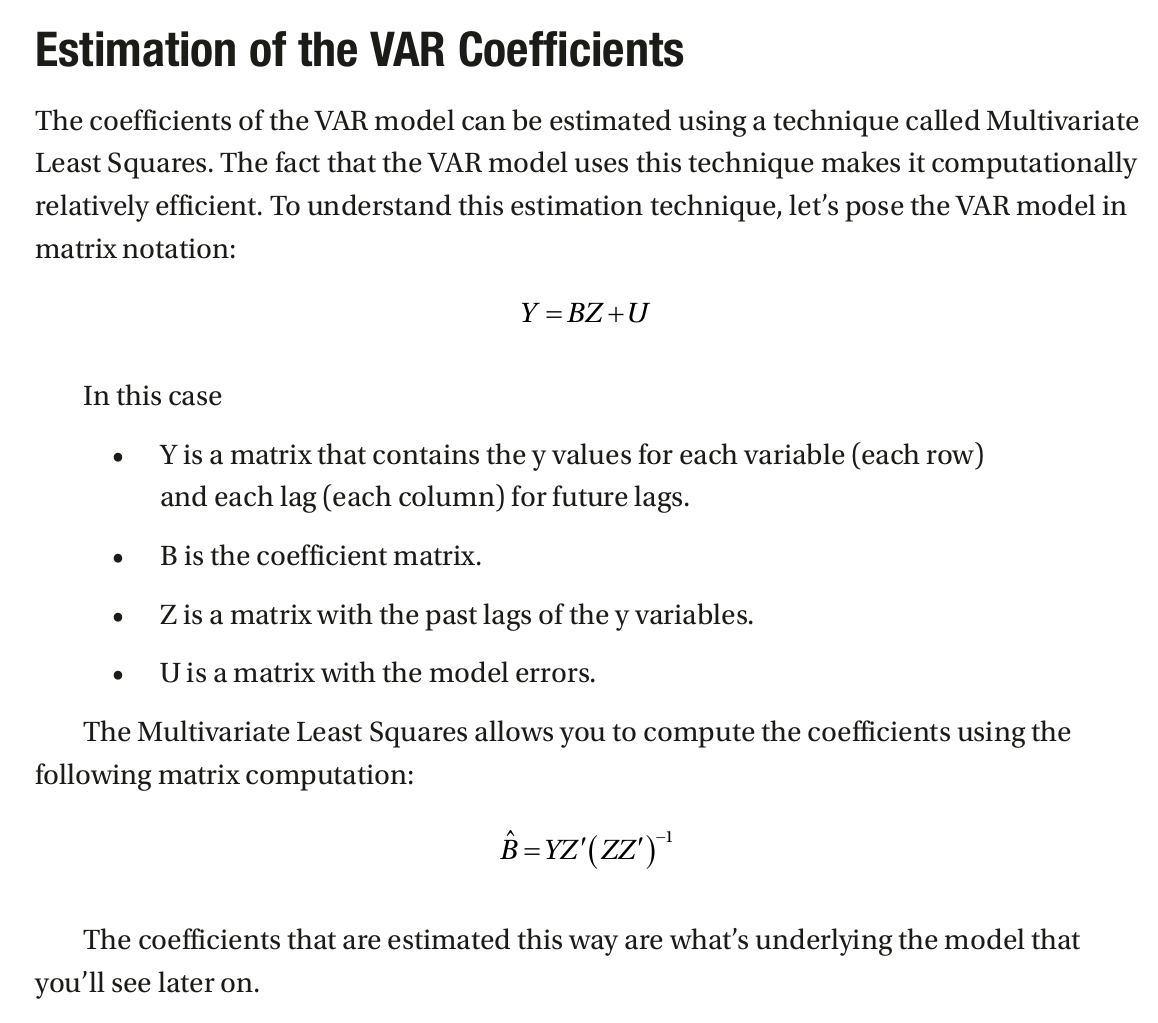

# Time Series Analysis by State Space Methods

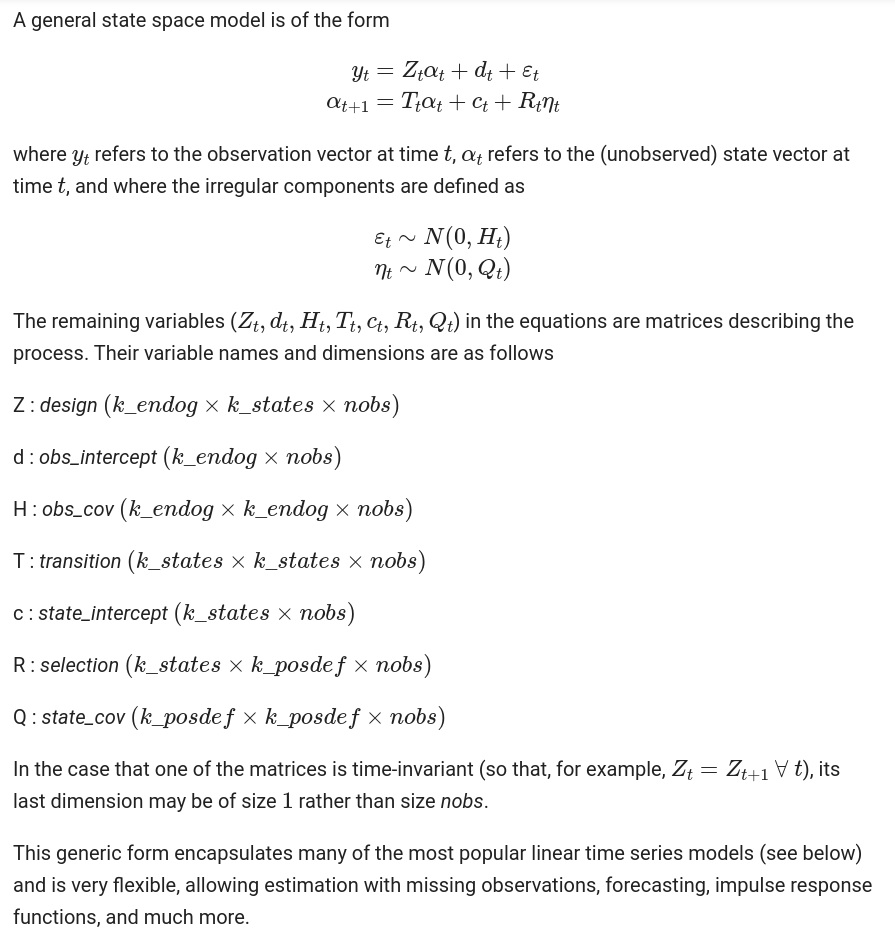

#One Multivariate Model vs. Multiple Univariate Models

Vector Autoregression should be applied to multiple target variables that are correlated.

If there is no or very little correlation between the variables, they cannot benefit from being combined in one and the same model.

Besides using a VAR model only in cases where it makes sense to combine variables in one and the same model, it is even more important to use objective model evaluation techniques using a train-test set and cross-validation. This can help you make the right choice between using one model for multiple variables and using a separate univariate model for each variable.

# VAR for Forecasting Walmart Sales

In the following example, you will continue to work on the Walmart sales data that have been presented.

Yet in the current example, rather than summing the sales per week, you will sum the weekly data per store.

As there are 45 stores in the dataset, this yields 45 weekly time series. You can create this data with a plot using th code from below:

## Listing 9-1. Preparing the Walmart data per store

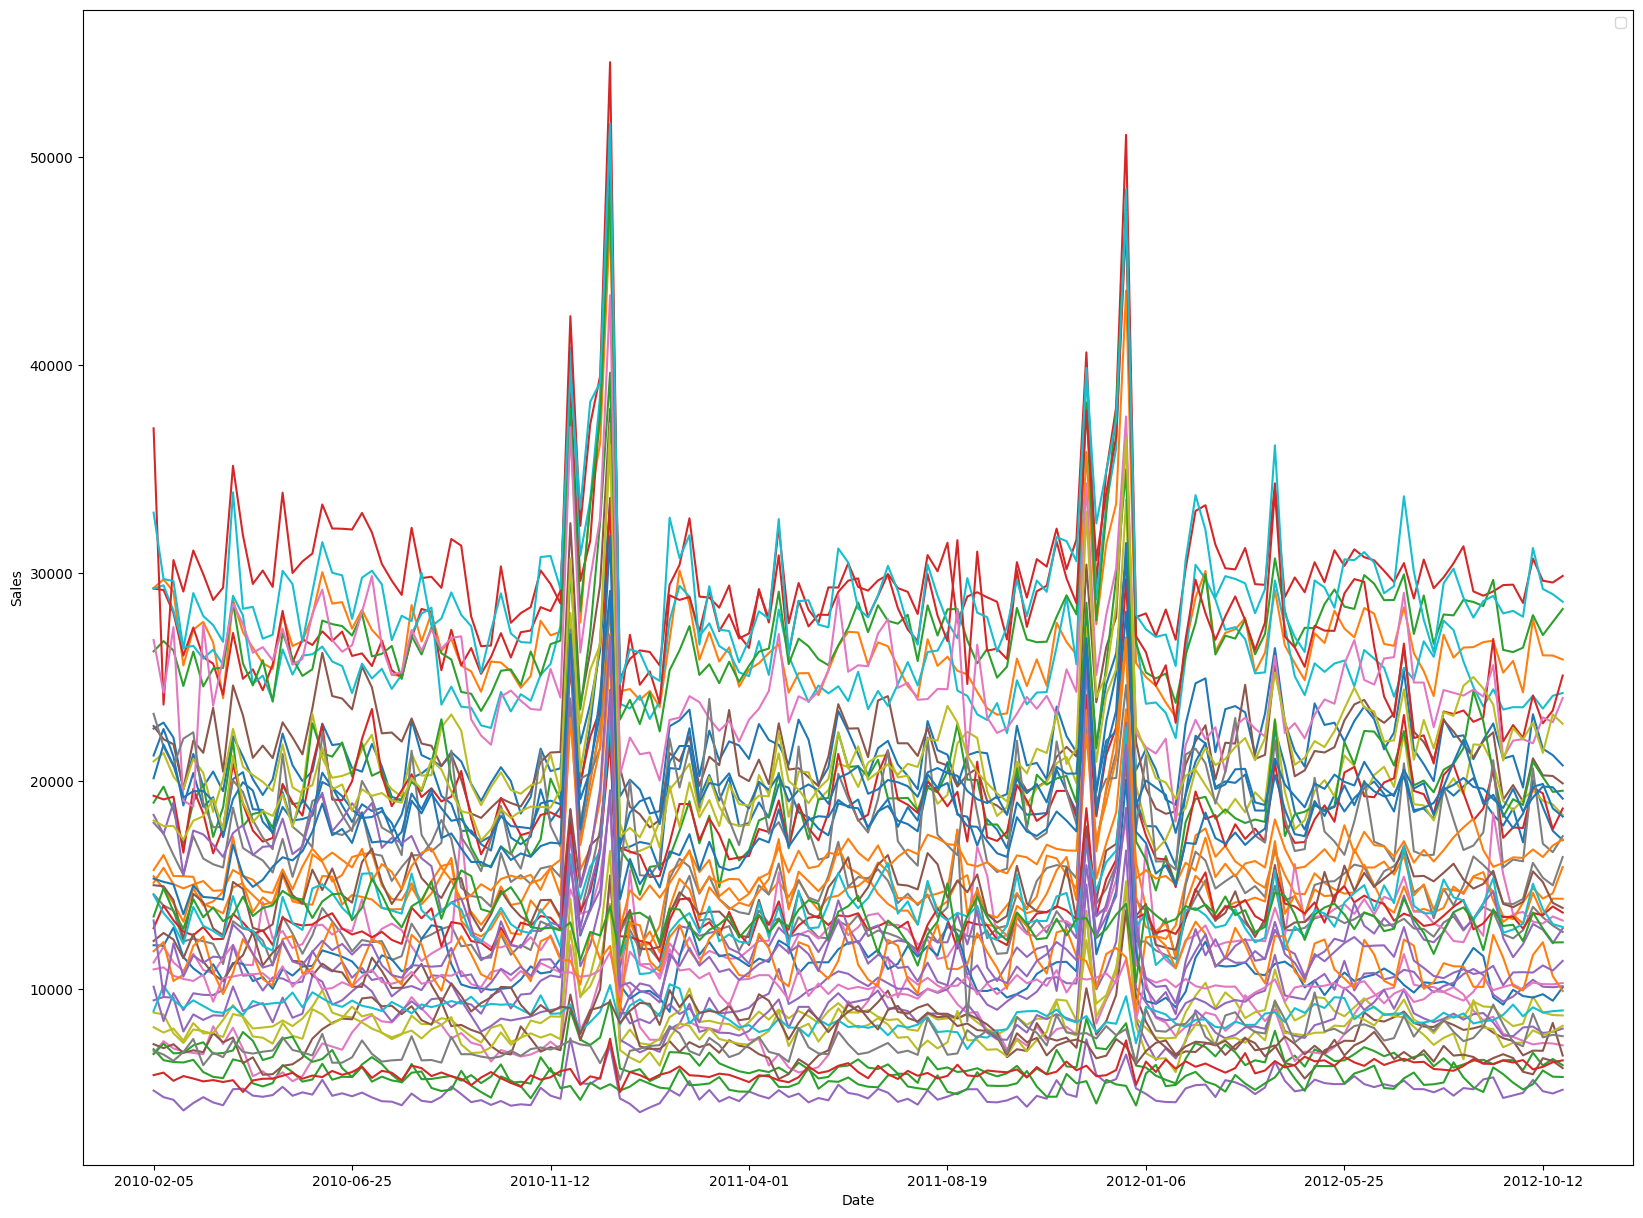

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPredictionWS2023/main/train.csv'
data = pd.read_csv(url)

data = data.pivot_table(index = 'Date', columns = 'Store', values = 'Weekly_Sales')

ax = data.plot(figsize=(20,15))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()


As you can see in this plot, the data per store follows the same pattern. For example, you can see that they almost all peak at the same moment. This shows the interest in using multivariate time series.

Now let’s get into the fit of a VAR model. As before, let’s use a ten-step forecast on a ten-step test dataset. The code to create a VAR model is:

## Listing 9-2. Fitting the VAR model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


0.8911349592624308


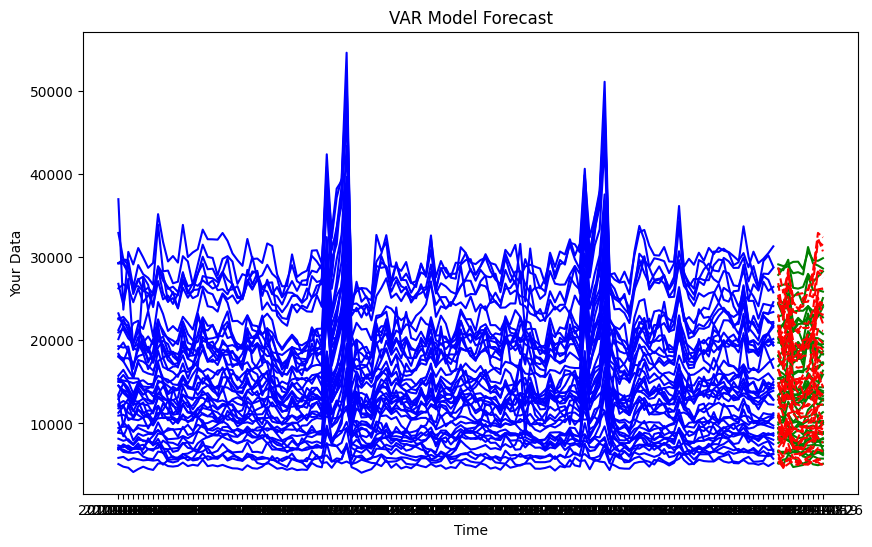

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR

train = data.iloc[:-10,:]
test = data.iloc[-10:,:]

model = VAR(train)
results = model.fit(maxlags=2)

lag_order = results.k_ar
fcst = results.forecast(train.values[-lag_order:], 10)

model_accuracy = 1 - mean_absolute_percentage_error(test, fcst)
print(model_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Train', color='blue')
plt.plot(test.index, test.values, label='Test', color='green')
plt.plot(test.index, fcst, label='Forecast', color='red', linestyle='dashed')

plt.title('VAR Model Forecast')
plt.xlabel('Time')
plt.ylabel('Your Data')
#plt.legend()
plt.show()

There are a few interesting things to notice in this code, which are different from what you have seen before.

Firstly, note that the data on which the model is fit is a multivariate dataset: it uses all the columns at once. This is as could be expected from a multivariate time series model.

Secondly, note that rather than doing a grid search, the example shows the use of an argument called maxlags. This means that the VAR model will optimize the choice for the order of the model itself, all while respecting a maximum lag.

In this case, the maxlags has been chosen at two, as going above two would require more coefficients to be estimated than possible using the current data.

The maxlags chooses the ideal order of the model using the AIC, the Akaike
Information Criterion. The Akaike Information Criterion is a famous KPI for goodness of fit of a model. The AIC is based only on the training data. It is therefore more prone to inducing overfitted models.

AIC is more used in classical statistical models and less in modern machine learning. Yet it is a fast and practical way of choosing order and therefore important to now. The negative aspect of VAR is that it requires very many parameters to be estimated. This makes it require enormous amounts of data to fit models with higher orders.

In the current example, it is impossible to use an order higher than two.
Also, you should notice in the code that when applying the forecast method, it is necessary to give the last part of training data. This is needed so that the model can compute the future by applying coefficients to the lagged variables.

The model accuracy obtained with the model is 0.89.

Despite the low possibility of model tuning with this model, it must be said that the performances are relatively good. But as always, remember that in practice, the only way to know whether this is good enough is by doing benchmarking and model comparison with other models.